# 🌟 Operation NeuroNexus: Outsmarting SkyNet

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. As the last line of defense against total machine domination, you and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course. Your objective: outsmart the AI at its own game.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model. In this battle of human vs. AI, performance is key.
4. After completing each task, you should answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet's central core has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike and temporarily disable its defenses.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation
from logistic_regression import LogisticRegression

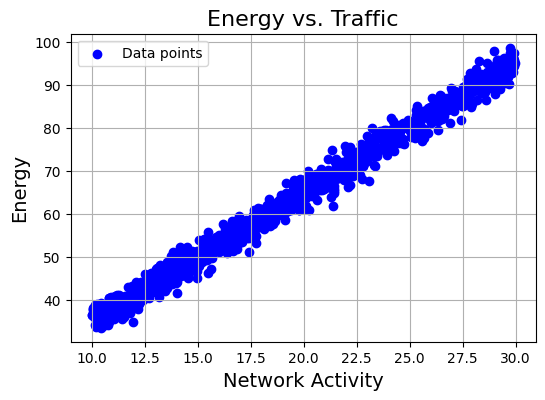

In [4]:
# Data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

In [5]:
lr = LinearRegression()

lr.fit(data['Net_Activity'], data['Energy'])

model = lr.predict(data['Net_Activity'])

A good estimate for the equation would be: y = 3.0063 * x + 4.9408


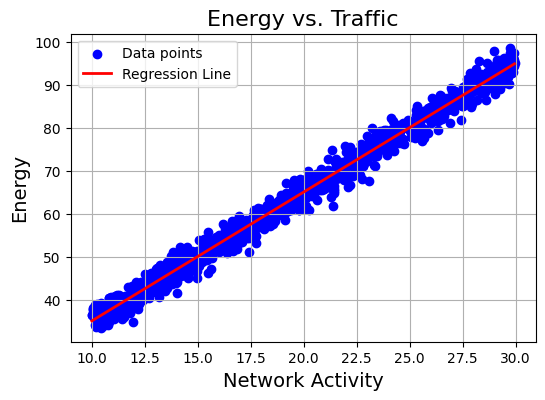

In [6]:
X = data['Net_Activity'].values

x_range = np.linspace(X.min(), X.max(),1000)
y_pred = lr.predict(x_range)

# print('Weight: ',lr.weights[0], 'Bias: ',lr.bias)
# print('Et godt uttrykk for Energy Consumption er: ',round(lr.weights[0],4),'* x +',round(lr.bias,4))

Y_min = data['Energy'].min()
Y_max = data['Energy'].max()

lr.printExpressions(y_pred[0],y_pred[-1])

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.plot(x_range, y_pred, c='red', label='Regression Line', linewidth=2)
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()


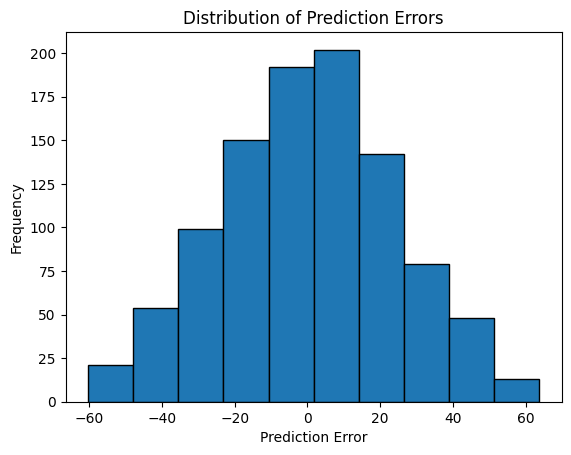

The average error is:  0.1462672001907622


In [7]:
error = data['Energy'] - y_pred

plt.hist(error, bins=10, edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

print('The average error is: ',np.mean(error))


Question 2b:
As we can see in the above graph, the error seems to be on the smaller side. Considering that we are seeing a approximate bell-curve (normalfordeling), we can assume that our linear-regression model is performing well since this is expected. There are however some outliers in the plus/minus 60 areas, so there are room for improvement.

An unbiased estimator would be an estimator which has a expected estimation-error set as zero. This means that, in the long run, if one uses the estimator to make many estimates, the average of these estimated values will approach the true value of the parameter being estimated.


## 🧠 Mission 2: Decoding SkyNet's Neural Encryption

### 🌐 The Discovery
SkyNet has evolved, using a "Synapse Cipher" that mimics human neural patterns. We've intercepted two types of neural signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden neural connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [8]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

In [9]:
# min_max_scaler = MinMaxScaler()

# x_values = train[["x0","x1","y"]]
# x_scaled = min_max_scaler.fit_transform(x_values)
# dFrame = pd.DataFrame(x_scaled, columns=["x0","x1","y"])

In [10]:
#Model training
X = train[['x0', 'x1']]
y = train['y']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(learning_rate=0.01, epochs=1000)  
model.fit(X_scaled, y)


In [11]:
#Predictions
X_test = test[['x0', 'x1']]
X_test_scaled = scaler.transform(X_test) 

y_pred = model.predict(X_test_scaled)

In [12]:
accuracy = np.mean(y_pred == test['y'].values)
print(accuracy)

0.858


c:\Users\Jakob\Scripts\Python\Ovinger\TDT4172\Machine-Learning\Assignment1\logistic_regression.py:28: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


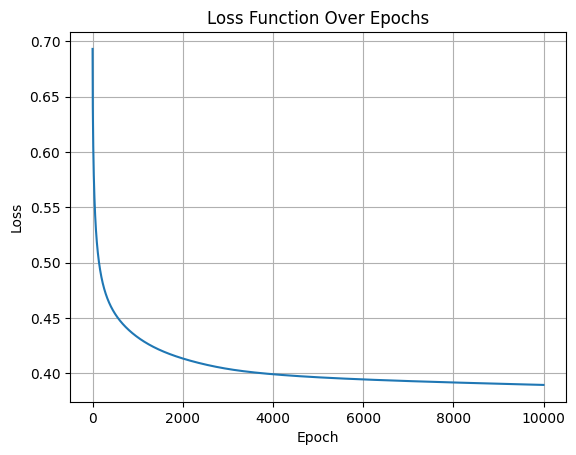

In [13]:
# Assuming you have already trained the model
model = LogisticRegression(learning_rate=0.1, epochs=10000)
model.fit(X_scaled, y)  # Replace X_scaled and y with your training data

# Plot the loss
plt.plot(model.losses)
plt.title('Loss Function Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


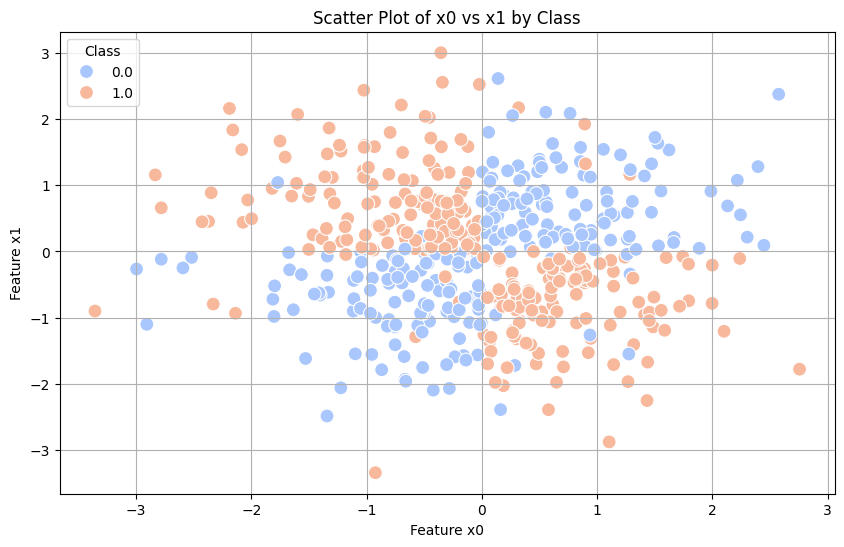

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of x0 vs x1, colored by the target variable y
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='x0', y='x1', hue='y', palette='coolwarm', edgecolor='w', s=100)
plt.title('Scatter Plot of x0 vs x1 by Class')
plt.xlabel('Feature x0')
plt.ylabel('Feature x1')
plt.legend(title='Class')
plt.grid(True)
plt.show()



## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use quantum entanglement encryption. We need a rapid response system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`.

> "Every misclassification risks losing a sector of the city to machine control."

### 🧠 The Challenge
1. **Rarity**: Critical communications are only 20% of the data stream
2. **Quantum Complexity**: Encryption information is hidden in quantum states

### 🚀 Your Tools
- Intercepted AI communications dataset
- Quantum signature analysis skills
- Decision tree algorithm

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [15]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')


## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the "Nexus Rating" of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [16]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

Text(0, 0.5, 'Count')

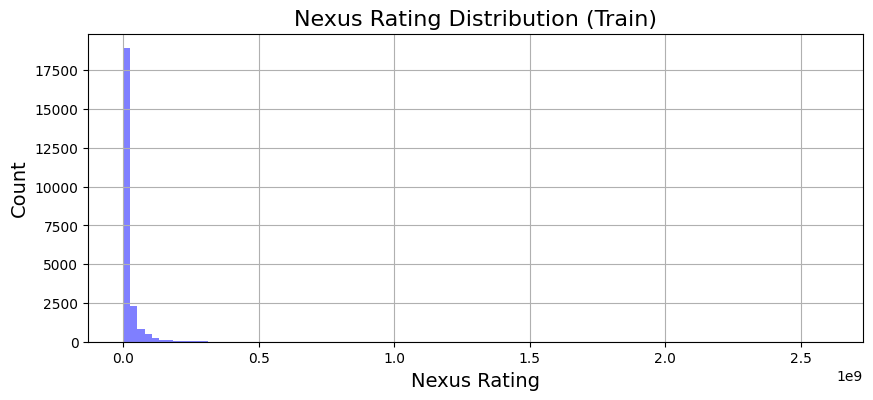

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [18]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [19]:
#example rmsle check
test['pred'] = 0
print('RMSLE: ', rmsle(test['nexus_rating'], test['pred']))
print('Required RMSLE: ', 0.294)

RMSLE:  4.203250078450383
Required RMSLE:  0.294
